In [1]:
from __future__ import print_function
from __future__ import division
import numpy as np
import scipy.stats as stats
import scipy.special as special
import pandas as pd
import chaospy as cp

%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

sns.set_style("ticks")#'whitegrid')#
#sns.set_context("talk")
sns.set_style({'axes.linewidth':0.5,
               'xtick.direction': u'in',
               'xtick.major.size': 1.,
               'xtick.minor.size': 0.5,
               'ytick.direction': u'in',               
               'ytick.major.size': 1.,
               'ytick.minor.size': 0.5})  


:0: FutureWarning: IPython widgets are experimental and may change in the future.


# 3) 2D with different correlation structures 

## a) Multivariate Normal

In [17]:
mu_x0 = np.array([.8, 4.])
sigma_x01 = 0.2
sigma_x02 = 0.8
rho = 0.6
C_x0 = np.array([[sigma_x01**2., sigma_x01*sigma_x02*rho],
                 [sigma_x01*sigma_x02*rho, sigma_x02**2.]])
dist_x0 = cp.MvNormal(mu_x0,C_x0)
sample_x0 = dist_x0.sample(size=int(2e4),rule='H')

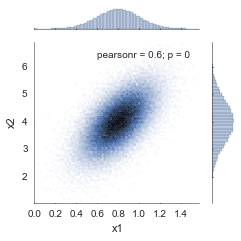

In [18]:
fig=sns.jointplot(sample_x0[0,:],
              sample_x0[1,:], 
              kind="hex", 
              stat_func=stats.pearsonr,
              size=3.5
             )

fig.set_axis_labels('x1','x2')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('Figures/3_MNormal_MC_sample_joint.pdf')
print()

## b) Rosemblat 

In [19]:
dist_x1_1 = cp.Normal(.8,.2)
dist_x1_2 = cp.Weibull(shape=2., scale=(dist_x1_1+0.3)**2.*2., shift=0)
dist_x1 = cp.J(dist_x1_1, dist_x1_2)
sample_x1 = dist_x1.sample(size=int(2e4),rule='H')

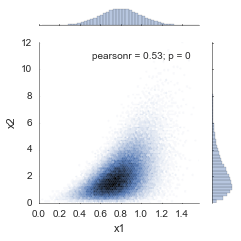

In [20]:
fig=sns.jointplot(sample_x1[0,:],
              sample_x1[1,:], 
              kind="hex", 
              stat_func=stats.pearsonr,
              size=3.5
             )

fig.set_axis_labels('x1','x2')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('Figures/3_Rosenblatt_MC_sample_joint.pdf')
print()

## c) Joe Copula

In [21]:
dist_x2_1 = cp.Normal(.8,.2)#cp.Uniform(.6,.8)
dist_x2_2 = cp.Weibull(shape=2., scale=2., shift=0) + 4.
dist_x2 = cp.J(dist_x2_1, dist_x2_2)
dist_x2 = cp.Joe(dist_x2, theta=2.)
sample_x2 = dist_x2.sample(size=int(2e4),rule='H')

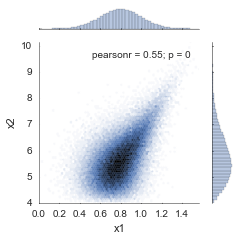

In [22]:
fig=sns.jointplot(sample_x2[0,:],
              sample_x2[1,:], 
              kind="hex", 
              stat_func=stats.pearsonr,
              size=3.5
             )

fig.set_axis_labels('x1','x2')
fig = plt.gcf()
fig.tight_layout()
fig.savefig('Figures/3_Joe_copula_MC_sample_joint.pdf')
print()